# Q. Using salary dataset to verify whether salary increases with increase in experience or not:

## Firstly importing libraries, dataset and forming hypothesis:

In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr as pr 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import linregress
import scipy.stats as ss

In [2]:
# Importing Data:
data=pd.read_csv('Salary_dataset.csv')

In [3]:
# Forming hypothesis:
print("Null Hypothesis(H0): There is no linear relationship between salary and experience")
print("Alternative Hypothesis(H1): There is a linear relationship between salary and experience")

Null Hypothesis(H0): There is no linear relationship between salary and experience
Alternative Hypothesis(H1): There is a linear relationship between salary and experience


## Performing descriptive analysis and finding Correlation, Regression and best fit model:

In [4]:
# Filtering Data:
experience=data["YearsExperience"]
salary=data["Salary"]

In [5]:
# Performing Descriptive Analysis:
mean_experience= experience.mean()
mean_salary= salary.mean()
num_of_records= np.size(salary)
dev_experience_salary= np.sum(experience*salary)-num_of_records*mean_experience*mean_salary
dev_salary_salary= np.sum(experience*experience)-num_of_records*mean_experience*mean_experience

In [6]:
# Calculation of Correlation coefficient:
Correlation,p_value=pr(experience,salary)
print("Correlation coefficient of the given Salary Dataset is:",Correlation)
print("P-Value of given Salary Dataset is:",p_value)

Correlation coefficient of the given Salary Dataset is: 0.9782416184887597
P-Value of given Salary Dataset is: 1.1430681092273186e-20


In [7]:
# Calculation of regression coefficient and intercept of regression coefficient:
slope= dev_experience_salary/dev_salary_salary
intercept= mean_salary-slope*mean_experience
a=(slope,intercept)

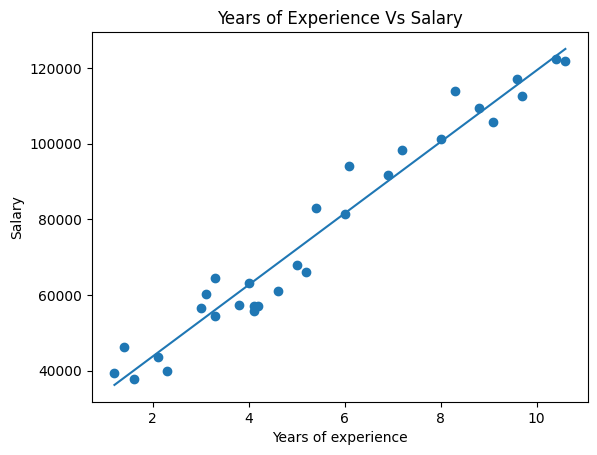

In [8]:
# Forming Correlation Graph:
plt.scatter(experience,salary)
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("Years of Experience Vs Salary")
# Forming Regression Curve:
predicted_salary= intercept+ slope*experience
plt.plot(experience, predicted_salary)
plt.show()

## Finding variability explained by the model:

In [9]:
# Calculation of coefficient of determination:
experience= np.array(experience).reshape(-1,1)
salary= np.array(salary).reshape(-1,1)
model= LinearRegression().fit(experience, salary)
R_squared= model.score(experience, salary)
print("Coefficient of Determination is:",R_squared)
print("intercept of model is:", model.intercept_)
print("slope of model is:", model.coef_)

Coefficient of Determination is: 0.9569566641435086
intercept of model is: [24848.20396652]
slope of model is: [[9449.96232146]]


In [10]:
# Calculation of adjusted R squared:
model2=sm.OLS(experience, salary).fit()
print("Adjusted R-squared is:", model2.rsquared_adj)
print("R-squared is:", model2.rsquared)

Adjusted R-squared is: 0.9744092740459992
R-squared is: 0.9752622982444659


In [11]:
# Evaluating significance:
alpha= 0.05
degree_of_freedom= 2
t_statistic= stats.t.ppf(1-alpha, degree_of_freedom)
print("t-statistic value is:",t_statistic)
p_val= stats.t.sf(np.abs(t_statistic), degree_of_freedom)*2
print("p_value for t test is:",p_val)

t-statistic value is: 2.919985580355516
p_value for t test is: 0.09999999999989513


In [12]:
if p_val>alpha:
    print("Null hypothesis rejected")
    print("There is a linear relationship between salary and experience")
else:
    print("Null hypothesis accepted")
    print("There is no linear relationship between salary and experience")

Null hypothesis rejected
There is a linear relationship between salary and experience


### According to the given salary dataset, the salary of employees increases with increase in their experience.